# MLP - CIFAR10

### Import Libraries

In [1]:
import time
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import matplotlib.pyplot as plt
from livelossplot import PlotLossesKeras
from keras import backend as K
K.set_image_data_format("channels_last")
from PIL import Image

### Methods Definition

In [2]:
def visualize_cifar10(X_train, y_train, X_test, y_test):
    for i in range(0, 9):  # Create a grid with 3x3 images
        plt.subplot(330 + 1 + i)
        plt.imshow(Image.fromarray(X_train[i]))
    plt.show()
    

def create_compile_model_mlp(num_pixels, num_classes):
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


def transform_to_gray_scale(X_train, y_train, X_test, y_test):
    X_train = X_train.mean(axis=-1)
    y_train = y_train.mean(axis=-1)
    X_test = X_test.mean(axis=-1)
    y_test = y_test.mean(axis=-1)
    return (X_train, y_train, X_test, y_test)
        

def cifar10_using_mlp(X_train, y_train, X_test, y_test, gray_scale):

    if gray_scale == False:
        # Transform the 32 * 32 * 3 matrix of the images into a vector with 3072 attributes for each image (because it is multilayer-perceptron)
        # (50000, 32, 32, 3)
        num_pixels = X_train.shape[1] * X_train.shape[2] * X_train.shape[3]
        X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
        X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
    else: 
        # (50000, 32, 32, 1)
        num_pixels = X_train.shape[1] * X_train.shape[2]
        X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
        X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

    # Normalize the pixel values from 0-255 to 0-1
    X_train = X_train / 255
    X_test = X_test / 255

    # Transform the label which is an integer into binary categories
    # The value becomes that corresponding to the position, class 5 becomes the list [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)

    # Output from 0 to 9 -> 10 possibilities
    num_classes = y_test.shape[1]

    # Define the network topology and compile
    model = create_compile_model_mlp(num_pixels, num_classes)
    #print(model.summary()XW)
    print_model(model, "model_cifar10_mlp.png")
    plotlosses = PlotLossesKeras()

    # Training the network
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=200, verbose=1, callbacks=[PlotLossesKeras()])
    
    #print_history_accuracy(history)
    #print_history_loss(history)

    # Final evaluation with the test cases
    scores = model.evaluate(X_test, y_test, verbose=0)

    #print('Scores: ', scores)
    print("MLP model accuracy CIFAR10: %.2f%%" % (scores[1]*100))
    print("MLP model loss CIFAR10: %.3f" % (scores[0]))
    

# Useful to visualize the tipology of the network in pdf or png
def print_model(model, fich):
    from keras.utils import plot_model
    plot_model(model, to_file=fich, show_shapes=True, show_layer_names=True)


# Utils to visualize the history of the learning
def print_history_accuracy(history):
    print(history.history.keys())
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


def print_history_loss(history):
    print(history.history.keys())
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

### Load Data

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### Visualize Data

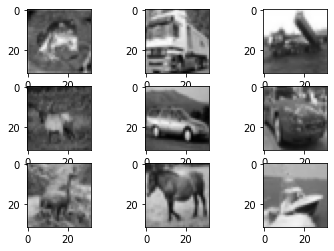

In [4]:
gray_scale = True
if gray_scale == True:
    (x_train, y_train, x_test, y_test) = transform_to_gray_scale(x_train, y_train, x_test, y_test)

visualize_cifar10(x_train, y_train, x_test, y_test)

### Model Execution

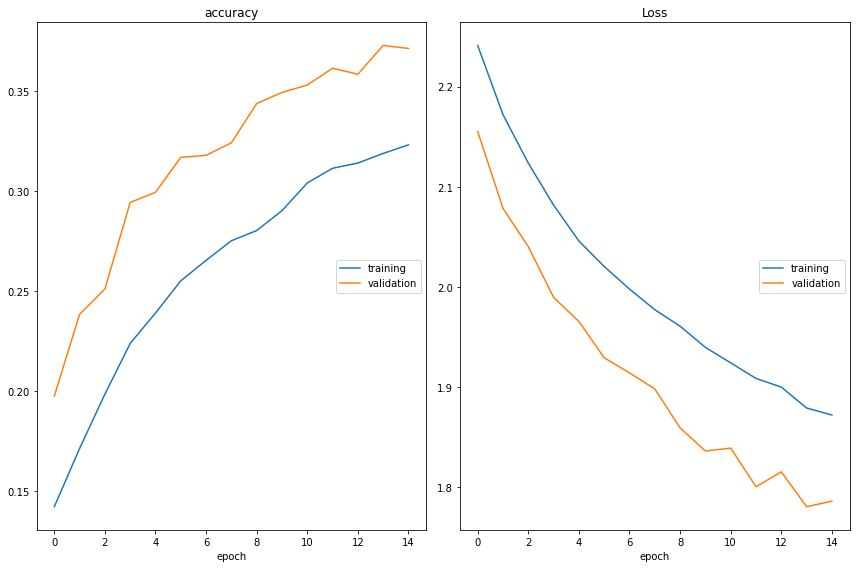

accuracy
	training         	 (min:    0.142, max:    0.323, cur:    0.323)
	validation       	 (min:    0.198, max:    0.373, cur:    0.371)
Loss
	training         	 (min:    1.872, max:    2.241, cur:    1.872)
	validation       	 (min:    1.780, max:    2.155, cur:    1.786)
MLP model accuracy CIFAR10: 37.15%
MLP model loss CIFAR10: 1.786
Processing Time: 88.156 seconds


In [5]:
start_time = time.time()
cifar10_using_mlp(x_train, y_train, x_test, y_test, gray_scale)
time_taken = time.time() - start_time

print("Processing Time: %.3f seconds" % (time_taken))